<a href="https://colab.research.google.com/github/shiernee/Advanced_ML/blob/main/Week3/WOA7015_Wk3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to WOA7015 Advance Machine Learning Lab - Week 3
This code is generated for the purpose of WOA7015 module.
The code is available in github https://github.com/shiernee/Advanced_ML 


# The effect of imbalanced data on AUROC 
The following code evaluates the effect of imbalanced data on the AUROC of TPR-FPR curve. 


In [1]:
# roc curve and auc on an imbalanced dataset
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler


In [2]:
# generate 2 class dataset 
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1000)

print(X)
print('-----------')
print(y)


[[-0.32584935  0.21897754  0.62061895 ...  2.84071377 -0.02582733
  -0.40885762]
 [-1.12624124 -0.86026727 -0.89264356 ... -0.92962064  0.59483549
   1.24052468]
 [-0.48993428 -0.7453348  -1.43801838 ... -1.67525801 -0.09994425
  -0.46569289]
 ...
 [ 0.47406074 -1.9209351   0.41681779 ...  1.04574815  1.092832
  -0.01541749]
 [-0.62731673 -0.94336697 -1.50694171 ... -0.85092941  0.99046917
   2.19583454]
 [ 0.88990126  0.81857103 -2.12551556 ...  1.00271323 -0.88101446
  -0.81149645]]
-----------
[1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0
 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0
 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1
 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1
 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0
 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0

In [3]:
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=1000)

print('trainy - class0: ', len(trainy)-trainy.sum())
print('trainy - class1: ', trainy.sum())
print('----------------------')
print('testy - class0: ', len(testy)-testy.sum())
print('testy - class1: ', testy.sum())
print('============================')

# make testing dataset balance
undersample = RandomUnderSampler(sampling_strategy='majority')
testX, testy = undersample.fit_resample(testX, testy)

print('Balanced Testing data')
print('testy - class0: ', len(testy)-testy.sum())
print('testy - class1: ', testy.sum())

trainy - class0:  253
trainy - class1:  247
----------------------
testy - class0:  249
testy - class1:  251
Balanced Testing data
testy - class0:  249
testy - class1:  249


In [4]:
# fit a model with training data
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)


LogisticRegression()

nth 0:positive: 249 negative: 249
---------------------------------------------
nth 1:positive: 225 negative: 249
---------------------------------------------
nth 2:positive: 200 negative: 249
---------------------------------------------
nth 3:positive: 175 negative: 249
---------------------------------------------
nth 4:positive: 150 negative: 249
---------------------------------------------
nth 5:positive: 125 negative: 249
---------------------------------------------
nth 6:positive: 100 negative: 249
---------------------------------------------
nth 7:positive: 75 negative: 249
---------------------------------------------
nth 8:positive: 50 negative: 249
---------------------------------------------
nth 9:positive: 25 negative: 249
---------------------------------------------


Text(0.5, 1.0, 'decreasing positive sample')

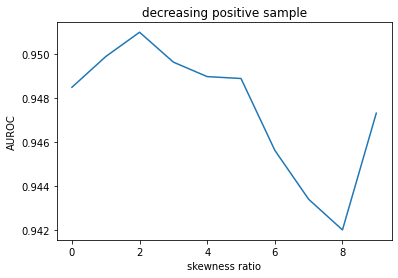

In [5]:
# repeat with different skewness 
roc_list = []
lr_acc = []
k=1
for i in range(0, 10):
  pos_ind = np.where(testy==1)[0]
  n = int(i/10 * len(pos_ind))
  tmp_testX, tmp_testy = np.copy(testX), np.copy(testy)
  tmp_testX = np.delete(tmp_testX, pos_ind[:n], axis=0)
  tmp_testy = np.delete(tmp_testy, pos_ind[:n], axis=0)
  print('nth %d:positive: %d negative: %d' 
        % (i, tmp_testy.sum(), tmp_testy.shape[0] - tmp_testy.sum()))
  print('---------------------------------------------')
  
  # predict probabilities
  lr_probs = model.predict_proba(tmp_testX)
  # keep probabilities for the positive outcome only
  lr_probs = lr_probs[:, 1]
  # calculate scores
  lr_auc = roc_auc_score(tmp_testy, lr_probs)

  # summarize scores
  # print('iteration %d: Logistic: ROC AUC=%.3f' % (k, lr_auc))
  k += 1
  # calculate roc curves
  lr_fpr, lr_tpr, _ = roc_curve(tmp_testy, lr_probs)
  roc_list.append(lr_auc)

plt.plot(np.arange(0, len(roc_list)), roc_list)
plt.xlabel('skewness ratio')
plt.ylabel('AUROC')
plt.title('decreasing positive sample')


# Exercise 1 (2%):
Does the AUROC (TPR vs FPR) affected by imbalanced class?




In [6]:
# Your answer here
# As seen from the graph above, the AUROC (TPR vs FPR) is very much similar (ranges from 0.948 - 0.955) with the increasing skewness ratio. 
# This makes sense as the AUROC (TPR vs FPR) is only dependent on the actual positive class. So, no matter the skewness ratio, the
# AUROC (TPR vs FPR) remains the same (or pretty similar).
# This is also in line with the notion that the ROC method increasingly becomes more optimistic with the skewness ratio increasing between classes.

# The effect of imbalanced data on AUROC of PR curve and F1 score
The following code evaluates the effect of imbalanced data on the AUROC of Precision-Recall and F1 value. 


In [7]:
# roc curve and auc on an imbalanced dataset
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, f1_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt


In [8]:
# generate 2 class dataset 
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1000)

print(X)
print('-----------')
print(y)


[[-0.32584935  0.21897754  0.62061895 ...  2.84071377 -0.02582733
  -0.40885762]
 [-1.12624124 -0.86026727 -0.89264356 ... -0.92962064  0.59483549
   1.24052468]
 [-0.48993428 -0.7453348  -1.43801838 ... -1.67525801 -0.09994425
  -0.46569289]
 ...
 [ 0.47406074 -1.9209351   0.41681779 ...  1.04574815  1.092832
  -0.01541749]
 [-0.62731673 -0.94336697 -1.50694171 ... -0.85092941  0.99046917
   2.19583454]
 [ 0.88990126  0.81857103 -2.12551556 ...  1.00271323 -0.88101446
  -0.81149645]]
-----------
[1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0
 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0
 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1
 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1
 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0
 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0

In [9]:
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=1000)

print('trainy - class0: ', len(trainy)-trainy.sum())
print('trainy - class1: ', trainy.sum())
print('----------------------')
print('testy - class0: ', len(testy)-testy.sum())
print('testy - class1: ', testy.sum())
print('============================')

# make testing dataset balance
undersample = RandomUnderSampler(sampling_strategy='majority')
testX, testy = undersample.fit_resample(testX, testy)

print('Balanced Testing date')
print('testy - class0: ', len(testy)-testy.sum())
print('testy - class1: ', testy.sum())


trainy - class0:  253
trainy - class1:  247
----------------------
testy - class0:  249
testy - class1:  251
Balanced Testing date
testy - class0:  249
testy - class1:  249


In [10]:
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

LogisticRegression()

nth 0:positive: 249 negative: 249
---------------------------------------------
nth 1:positive: 225 negative: 249
---------------------------------------------
nth 2:positive: 200 negative: 249
---------------------------------------------
nth 3:positive: 175 negative: 249
---------------------------------------------
nth 4:positive: 150 negative: 249
---------------------------------------------
nth 5:positive: 125 negative: 249
---------------------------------------------
nth 6:positive: 100 negative: 249
---------------------------------------------
nth 7:positive: 75 negative: 249
---------------------------------------------
nth 8:positive: 50 negative: 249
---------------------------------------------
nth 9:positive: 25 negative: 249
---------------------------------------------


Text(0.5, 1.0, 'decreasing positive sample')

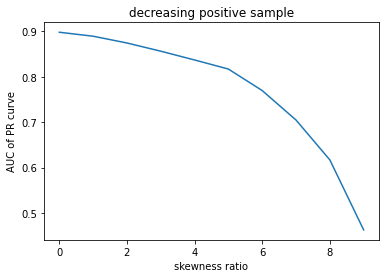

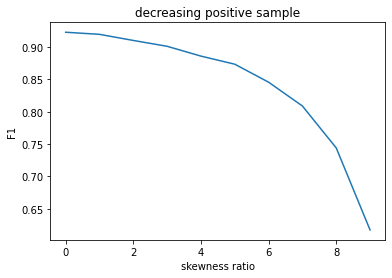

In [11]:
# repeat with different skewness 
roc_list = []
f1_list = []

k=1
for i in range(0, 10):
  pos_ind = np.where(testy==1)[0]
  n = int(i/10 * len(pos_ind))
  tmp_testX, tmp_testy = np.copy(testX), np.copy(testy)
  tmp_testX = np.delete(tmp_testX, pos_ind[:n], axis=0)
  tmp_testy = np.delete(tmp_testy, pos_ind[:n], axis=0)
  print('nth %d:positive: %d negative: %d' 
        % (i, tmp_testy.sum(), tmp_testy.shape[0] - tmp_testy.sum()))
  print('---------------------------------------------')
  

  # predict probabilities
  lr_probs = model.predict_proba(tmp_testX)
  # keep probabilities for the positive outcome only
  lr_probs = lr_probs[:, 1]
  # predict class values
  yhat = model.predict(tmp_testX)
  # calculate precision and recall for each threshold
  lr_precision, lr_recall, _ = precision_recall_curve(tmp_testy, lr_probs)
  # calculate scores
  lr_f1, lr_auc = f1_score(tmp_testy, yhat), auc(lr_recall, lr_precision)
  # summarize scores
  # print('iteration%d Logistic: f1=%.3f auc=%.3f' % (k, lr_f1, lr_auc))
  k += 1
  roc_list.append(lr_auc)
  f1_list.append(lr_f1)

plt.plot(np.arange(0, len(roc_list)), roc_list)
plt.xlabel('skewness ratio')
plt.ylabel('AUC of PR curve')
plt.title('decreasing positive sample')

plt.figure()
plt.plot(np.arange(0, len(roc_list)), f1_list)
plt.xlabel('skewness ratio')
plt.ylabel('F1')
plt.title('decreasing positive sample')


# Exercise 2 (4%):
Does the AUROC (Precision vs Recall), F1 score affected by imbalanced class?

In [12]:
# Your answer here
# In contrast to the AUC (TPR vs FPR), Precision vs Recall and F1 seem to do way worse for imbalanced dataset. It is backed up by the fact that
# it takes into account both the actual classes, since precision = TP/TP+FP (TP belong to actual positive class and FP belong to actual negative class).
# So, as the ratio of skewness increases, precision decreases (since the magnitude of the denominator increases).
# Similarly, for calculating F1 (2*(Recall * Precision) / (Recall + Precision)) we also take values from both the classes. Hence, it is affected by the 
# increasing skewness ratio as well.

# This is in line with the claim that even if the data is highly skewed, the AUROC (Precision vs Recall) and F1 will show a low score if it is 
# misclassifying majority of minority class to such an extent that at higher skewness ratio, the AUROC (Precision vs Recall) and F1 is near 50%. This is
# as bad as a random classifier.

# ***Let's go back to power point - slide 13***

# Convex function

This is the code to generate the graph in slide 38

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

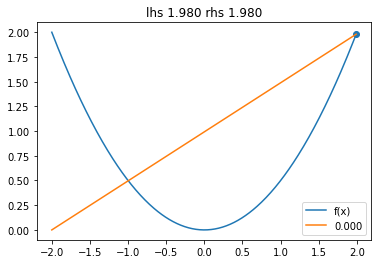

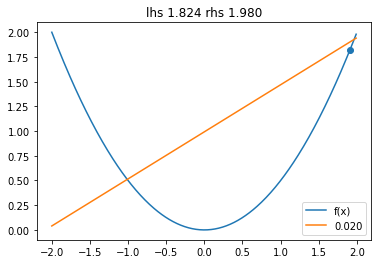

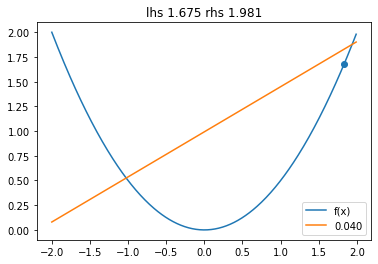

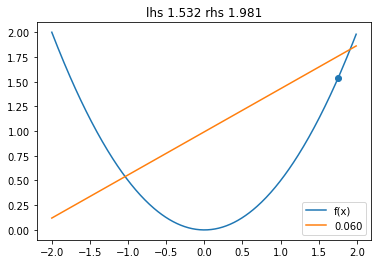

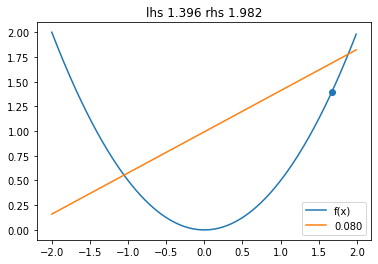

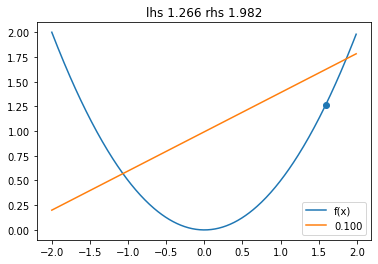

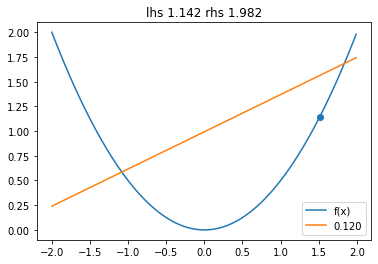

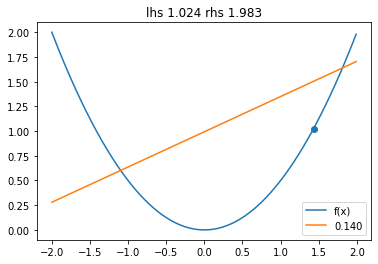

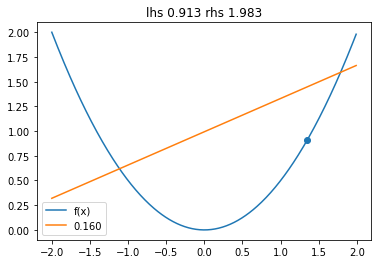

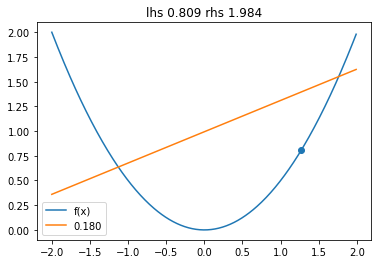

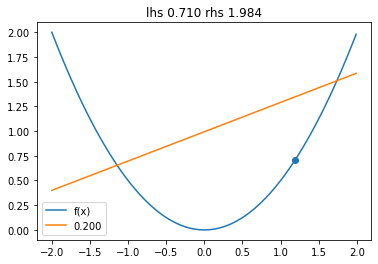

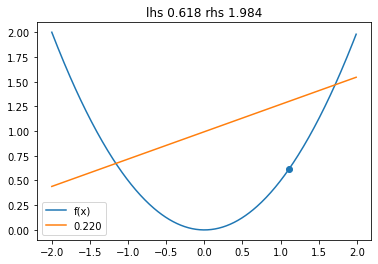

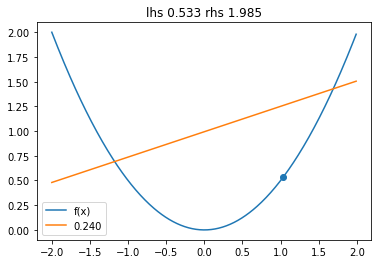

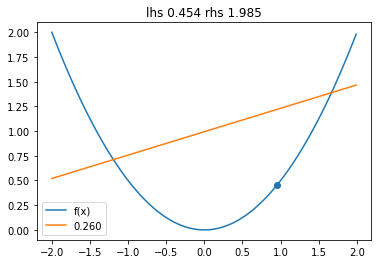

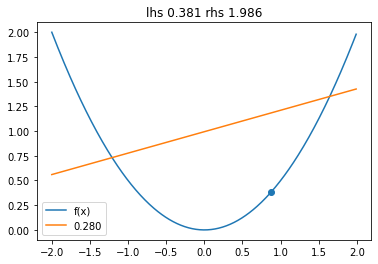

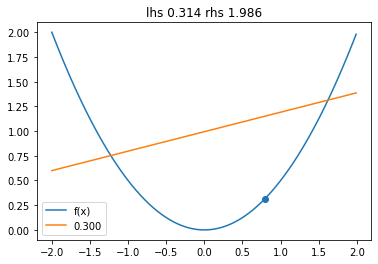

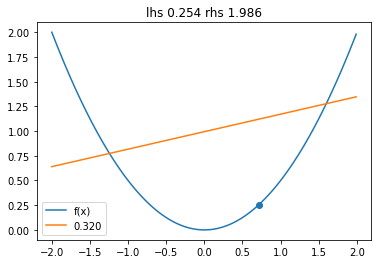

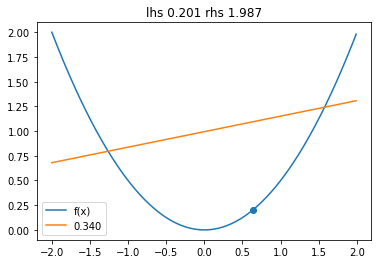

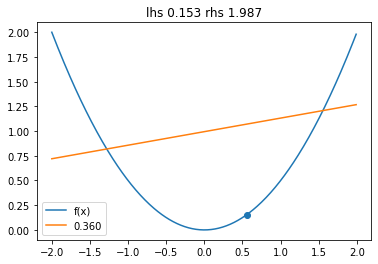

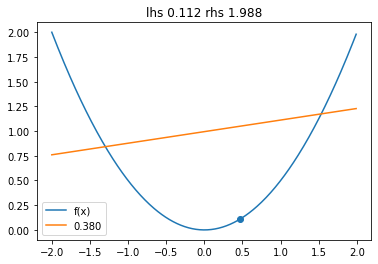

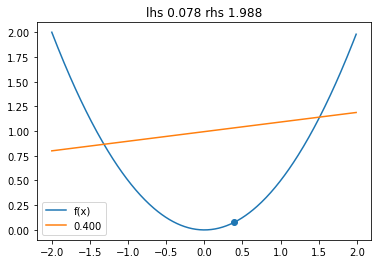

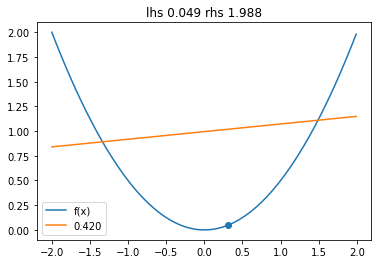

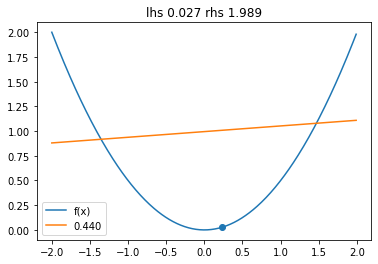

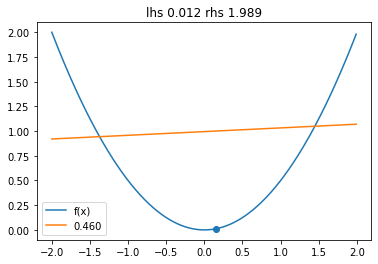

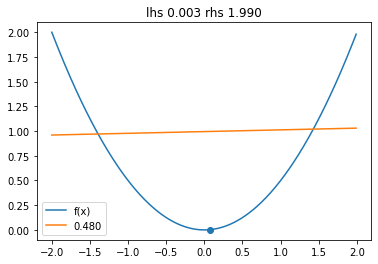

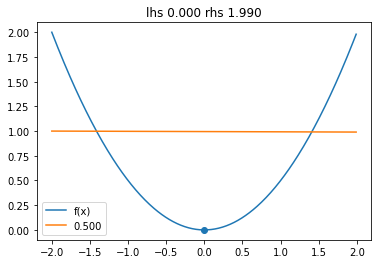

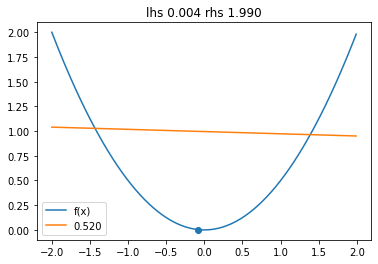

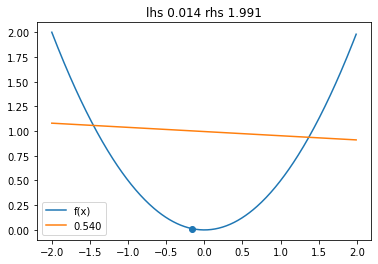

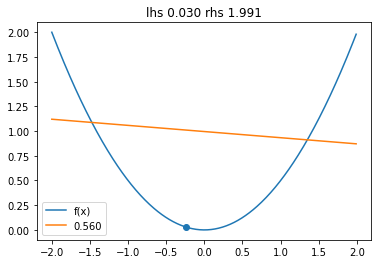

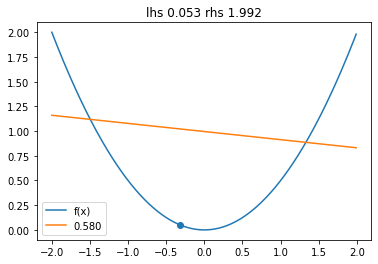

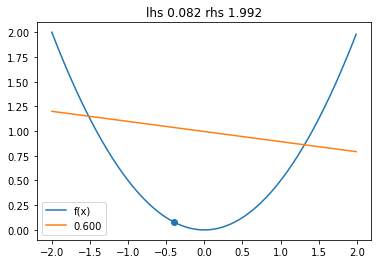

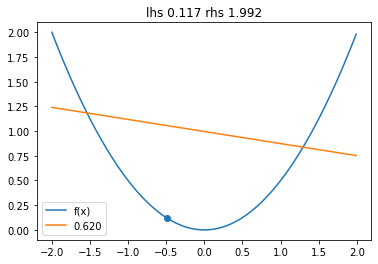

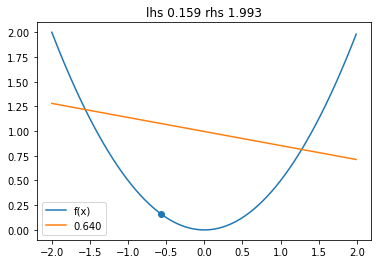

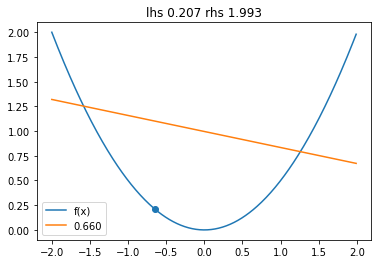

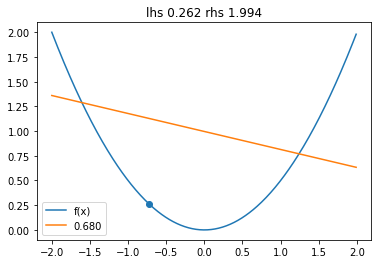

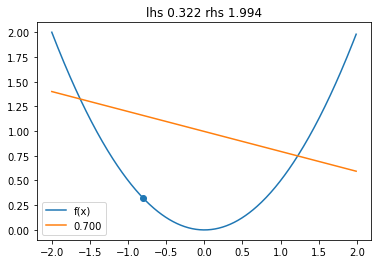

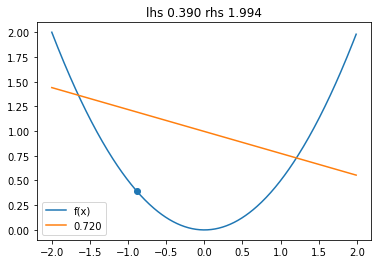

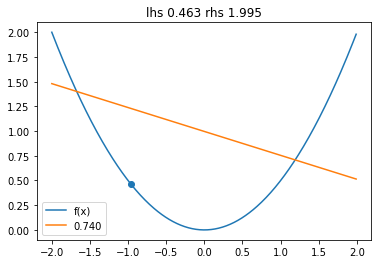

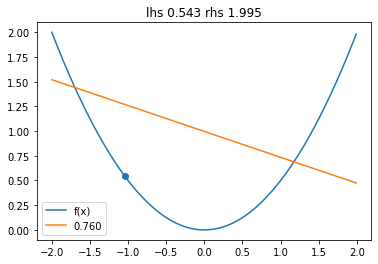

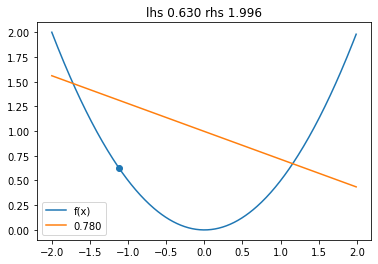

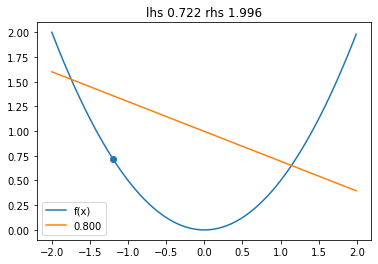

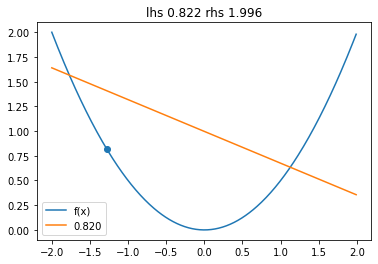

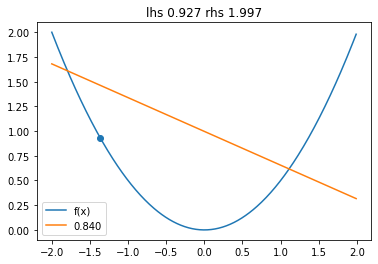

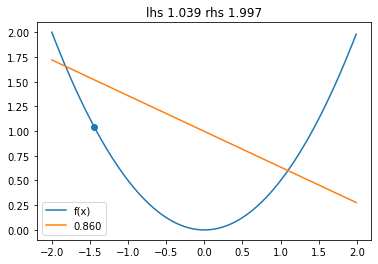

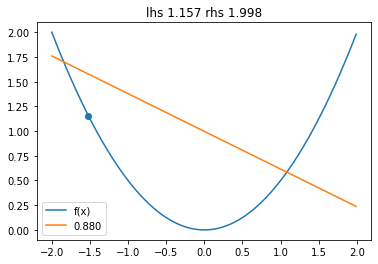

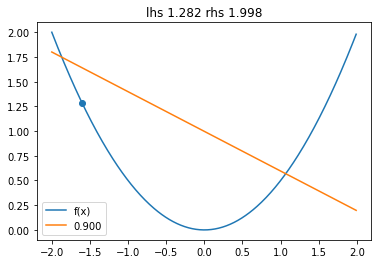

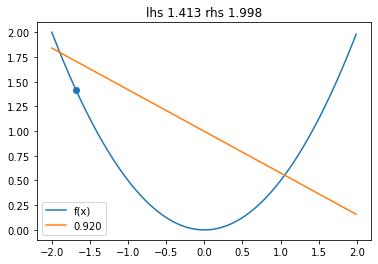

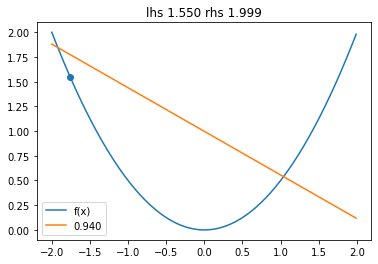

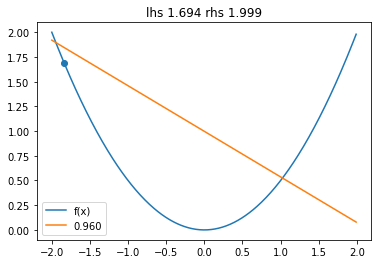

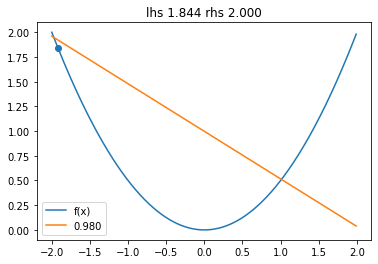

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

x = np.arange(-2, 2, 0.01)

# choose one function to try
f = lambda x: 0.5 * x ** 2 # Convex
# f = lambda x: np.cos(np.pi * x)  # Nonconvex
# f = lambda x: -0.5 * x ** 4  # Nonconvex

filenames=[]
for lamda in np.arange(0, 1, 0.02):
  # LHS
  tmp_x = lamda*x[0] + (1-lamda)*x[-1]

  # RHS
  x_line, y_line = np.array([x[0], x[-1]]), np.array([lamda*f(x[0]), (1-lamda)*f(x[-1])])

  # compute LHS and RHS
  LHS = f(tmp_x)
  RHS = lamda*f(x[0]) + (1-lamda)*f(x[-1])
  if LHS > RHS:
    print('At lamda %0.3f, it is concave' % lamda)
    print('lhs %.5f rhs %.5f' % (LHS, RHS))

  plt.figure()
  # original graph
  plt.plot(x, f(x), label='f(x)')
  # plot RHS
  plt.plot(x_line, y_line, label='%0.3f' % lamda)
  # plot LHS
  plt.scatter(tmp_x, f(tmp_x))
  #title, legennd
  plt.title('lhs %.3f rhs %.3f' % (LHS, RHS))
  plt.legend()
  plt.savefig('lamda %0.3f.png' % lamda)
  # plt.close()
  filenames.append('lamda %0.3f.png' % lamda)

# Build GIF
with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Understand how learning rate affects your SGD optimization

We will train a neural network for a pretty simple task, i.e. calculating the exclusive-or (XOR) of two input. 

<br> 
<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week3/XOR.jpg" width="512"/>



In [14]:
import random
import numpy as np

In [15]:
# generate a function for XOR
x1 = random.randint(0, 1)
x2 = random.randint(0, 1)
yy = 0 if (x1 == x2) else 1

print('x1:', x1)
print('x2:',x2)
print('yy:',yy)

x1: 0
x2: 0
yy: 0


In [16]:
x1 = random.randint(0, 1)
x2 = random.randint(0, 1)
yy = 0 if (x1 == x2) else 1

# centered at zero
x1 = 2. * (x1 - 0.5)
x2 = 2. * (x2 - 0.5)
yy = 2. * (yy - 0.5)

print('x1:', x1)
print('x2:',x2)
print('yy:',yy)

x1: 1.0
x2: -1.0
yy: 1.0


In [17]:
x1 = random.randint(0, 1)
x2 = random.randint(0, 1)
yy = 0 if (x1 == x2) else 1

# centered at zero
x1 = 2. * (x1 - 0.5)
x2 = 2. * (x2 - 0.5)
yy = 2. * (yy - 0.5)

# add noise
x1 += 0.1 * random.random()
x2 += 0.1 * random.random()
yy += 0.1 * random.random()

print('x1:', x1)
print('x2:',x2)
print('yy:',yy)

x1: 1.0704535537527784
x2: 1.0343848352505092
yy: -0.9957503600776282


In [18]:
# make it into function 
def make_data():
    x1 = random.randint(0, 1)
    x2 = random.randint(0, 1)
    yy = 0 if (x1 == x2) else 1
 
    # centered at zero
    x1 = 2. * (x1 - 0.5)
    x2 = 2. * (x2 - 0.5)
    yy = 2. * (yy - 0.5)
 
    # add noise
    x1 += 0.1 * random.random()
    x2 += 0.1 * random.random()
    yy += 0.1 * random.random()
 
    return [x1, x2, ], yy
 

In [19]:
# create batch samples
batch_size = 10
def make_batch():
    data = [make_data() for ii in range(batch_size)]
    labels = [label for xx, label in data]
    data = [xx for xx, label in data]
    return np.array(data, dtype='float32'), np.array(labels, dtype='float32')
 
print(make_batch())


(array([[ 1.0045877 , -0.9016586 ],
       [ 1.0091324 ,  1.0404627 ],
       [-0.9040666 , -0.9501631 ],
       [-0.9155848 , -0.91022116],
       [ 1.0159416 ,  1.086856  ],
       [ 1.0742935 ,  1.0900314 ],
       [-0.9003064 ,  1.0288993 ],
       [-0.9700804 ,  1.0591054 ],
       [ 1.0150049 ,  1.0906163 ],
       [ 1.0361483 , -0.9464334 ]], dtype=float32), array([ 1.0135783 , -0.9112732 , -0.91327566, -0.9638695 , -0.9409629 ,
       -0.93228245,  1.0385262 ,  1.0641502 , -0.9794432 ,  1.0401516 ],
      dtype=float32))


In [20]:
# generate  500 train and 50 test data 
train_data = [make_batch() for ii in range(500)]
test_data = [make_batch() for ii in range(50)]


In [21]:
# import torch libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
 

In [22]:
## Define our neural network class
torch.manual_seed(42)
 
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
 
        self.dense1 = nn.Linear(2, 2)
        self.dense2 = nn.Linear(2, 1)
 
    def forward(self, x):
        x = F.tanh(self.dense1(x))
        x = self.dense2(x)
        return torch.squeeze(x)
 


In [23]:
# initialize our network
model = NN()
lr = 0.0001
## optimizer = stochastic gradient descent
optimizer = optim.SGD(model.parameters(), lr)

In [24]:
## train and test functions
 
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_data):
        data, target = Variable(torch.from_numpy(data)), Variable(torch.from_numpy(target))
        optimizer.zero_grad()
        output = model(data)
        loss = F.mse_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} {}\tLoss: {:.4f}'.format(epoch, batch_idx * len(data), loss.item()))
 
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_data:
        data, target = Variable(torch.from_numpy(data), volatile=True), Variable(torch.from_numpy(target))
        output = model(data)
        test_loss += F.mse_loss(output, target)
        correct += (np.around(output.data.numpy()) == np.around(target.data.numpy())).sum()
 
    test_loss /= len(test_data)
    test_loss = test_loss.item()
 
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, batch_size * len(test_data), 100. * correct / (batch_size * len(test_data))) )
 

In [25]:
## run experiment 
nepochs = 1000

print('lr=', lr)
for epoch in range(1, nepochs + 1):
    train(epoch)
    print('---------------------------------------------')
    test()
 
 # everytime rerun this cell, please re initialize your network, and re run the train test function 

lr= 0.0001
Train Epoch: 1 0	Loss: 1.6794
Train Epoch: 1 1000	Loss: 0.9110
Train Epoch: 1 2000	Loss: 1.1720
Train Epoch: 1 3000	Loss: 1.4434
Train Epoch: 1 4000	Loss: 1.2405


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


---------------------------------------------

Test set: Average loss: 1.3982, Accuracy: 114/500 (22.80%)

Train Epoch: 2 0	Loss: 1.5645
Train Epoch: 2 1000	Loss: 0.8681
Train Epoch: 2 2000	Loss: 1.1174
Train Epoch: 2 3000	Loss: 1.3663
Train Epoch: 2 4000	Loss: 1.1865
---------------------------------------------

Test set: Average loss: 1.3242, Accuracy: 114/500 (22.80%)

Train Epoch: 3 0	Loss: 1.4713


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


Streaming output truncated to the last 5000 lines.
Train Epoch: 445 4000	Loss: 0.0012
---------------------------------------------

Test set: Average loss: 0.0012, Accuracy: 500/500 (100.00%)

Train Epoch: 446 0	Loss: 0.0013
Train Epoch: 446 1000	Loss: 0.0011
Train Epoch: 446 2000	Loss: 0.0014
Train Epoch: 446 3000	Loss: 0.0008
Train Epoch: 446 4000	Loss: 0.0012
---------------------------------------------

Test set: Average loss: 0.0012, Accuracy: 500/500 (100.00%)

Train Epoch: 447 0	Loss: 0.0013
Train Epoch: 447 1000	Loss: 0.0011
Train Epoch: 447 2000	Loss: 0.0014
Train Epoch: 447 3000	Loss: 0.0008
Train Epoch: 447 4000	Loss: 0.0012
---------------------------------------------

Test set: Average loss: 0.0012, Accuracy: 500/500 (100.00%)

Train Epoch: 448 0	Loss: 0.0013
Train Epoch: 448 1000	Loss: 0.0011
Train Epoch: 448 2000	Loss: 0.0014
Train Epoch: 448 3000	Loss: 0.0008
Train Epoch: 448 4000	Loss: 0.0012
---------------------------------------------

Test set: Average loss: 0.0

## Exercise 3 (6%) 
For this experiment, try the following learning rate (lr=0.0001, 0.001, 0.01, 0.1). What do you observed? <br><br>
For example, at lr=0.001, test acc reach 100% at epoch xx... At lr=0.001, test acc reach 100% at epoch xx. As lr increases / decreases, what happen?


### Your answer here


For lr = 0.0001, test accuracy reached 100% at epoch 180

For lr = 0.001, test accuracy reached 100% at epoch 19

For lr = 0.01, test accuracy reached 100% at epoch 3

For lr = 0.1, test accuracy reached 100% at epoch 2

From the above experiments it can be observed that with higher learning rate, the convergence rate becomes much faster. To put it the other way, lower the learning rate - more time and more computing expenses it will require.
However, with bigger learning rate there is a chance for the model to overshoot and keep oscillating without converging. 

# Submission Instructions
Once you are finished, follow these steps:

Restart the kernel and re-run this notebook from beginning to end by going to Kernel > Restart Kernel and Run All Cells.
If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.
Double check that there is a number next to each code cell and that these numbers are in order.
Then, submit your lab as follows:

Go to File > Print > Save as PDF.
Double check that the entire notebook, from beginning to end, is in this PDF file. Make sure Solution for Exercise 5 are in for marks. 
Upload the PDF to Spectrum. 

# Acknowledgement

Some of the works are inspired from 
1. Effect of learning rate on AI model = https://www.commonlounge.com/discussion/5076b2cfb2364594ba608fca3ac606bb